In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys


In [3]:
# Load the data from CSV file
data = pd.read_csv("/home/surya/Downloads/PlayTennis.csv")

# Separate features (X) and target (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Display the first few rows of the dataset
data.head()


,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column in X
X_encoded = X.apply(le.fit_transform)

# Display the first few rows of the encoded dataset
X_encoded.head()


,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [5]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [6]:
# Create and train the Decision Tree Classifier with 'entropy' criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model's accuracy on the test set
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [7]:
# Function to classify a new sample
def classify_sample(sample):
    # Encode the sample based on the same encoding as training data
    encoded_sample = [le.fit_transform(X[col])[le.transform([sample[col]])[0]] for col in X.columns]
    
    # Make the prediction
    prediction = clf.predict([encoded_sample])[0]
    return prediction


In [8]:
# Print feature importances to understand which features are most important
print("\nFeature importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    print(f"{feature}: {importance:.4f}")



Feature importances:
Outlook: 0.6155
Temperature: 0.0000
Humidity: 0.1451
Wind: 0.2394


In [10]:
# Interactive classification for new samples (press 'quit' to exit the loop)
while True:
    print("\nEnter a new sample to classify (or 'quit' to exit):")
    
    sample = {}
    for col in X.columns:
        value = input(f"Enter value for {col}: ")
        if value.lower() == 'quit':
            sys.exit()
        sample[col] = value
    
    result = classify_sample(sample)
    print(f"Classification: {result}")



Enter a new sample to classify (or 'quit' to exit):


Enter value for Outlook:  Sunny
Enter value for Temperature:  Hot
Enter value for Humidity:  Normal
Enter value for Wind:  Strong


/home/surya/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Classification: Yes

Enter a new sample to classify (or 'quit' to exit):


Enter value for Outlook:  quit


SystemExit: 

/home/surya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Decision tree visualization saved as 'playtennis_decision_tree.png'


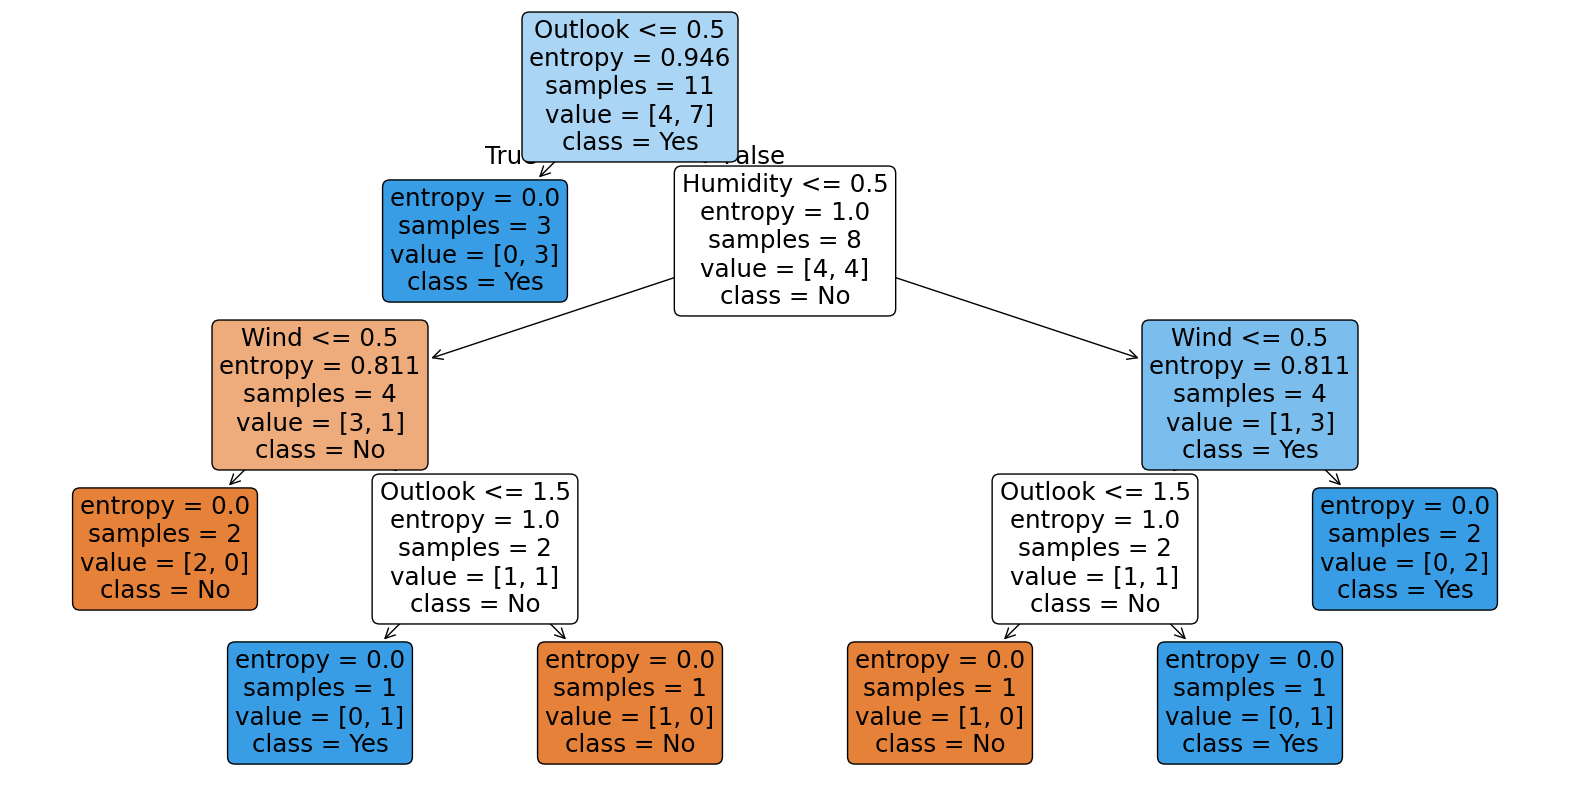

In [11]:
# Visualize the decision tree
plt.figure(figsize=(20,10))

# Plot the decision tree using plot_tree function
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)

# Save the decision tree visualization as a PNG file
plt.savefig('playtennis_decision_tree.png')

print("Decision tree visualization saved as 'playtennis_decision_tree.png'")
